In [17]:
# Imports
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *

Populating the interactive namespace from numpy and matplotlib


/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['choice', 'plt', 'entropy', 'pi', 'flatten']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [38]:
def get_dists(A, pi0, T):
    ps = []
    for t in range(0,T+1):
        ps.append(linalg.matrix_power(A,t).dot(pi0))
    return array(ps)    

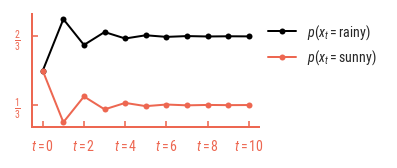

In [71]:
#Plot
figure(figsize=cm2inch(4,2))

# Transition matrix
A = array([[.5,1],[.5,0]])

ps = get_dists(A, array([.5, .5]), 10)
l1, = plot(ps[:,0], 'o-', label=r'$p(x_t = \mathsf{rainy})$')
l2, = plot(ps[:,1], 'o-', label=r'$p(x_t = \mathsf{sunny})$')

sns.despine()
legend(bbox_to_anchor=(1,1))
xticks(arange(0,len(ps),2), [r'$t='+str(t)+'$' for t in arange(0,len(ps)+1,2)])
yticks([1/3, 2/3], [r'$\frac{1}{3}$',r'$\frac{2}{3}$'])
# ylim(.1,.8)

subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('FIG06-convergence-single.pdf', bbox_inches='tight')
copyfig('FIG06-convergence-single.pdf')

## Multiple initial distributions

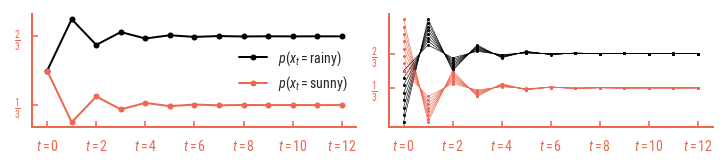

In [73]:
#Plot
figure(figsize=cm2inch(12,2))

# Transition matrix
A = array([[.5,1],[.5,0]])

subplot(121)
ps = get_dists(A, array([.5, .5]), 12)
l1, = plot(ps[:,0], 'o-', label=r'$p(x_t = \mathsf{rainy})$')
l2, = plot(ps[:,1], 'o-', label=r'$p(x_t = \mathsf{sunny})$')

legend(loc=5, facecolor='none')
xticks(arange(0,len(ps),2), [r'$t='+str(t)+'$' for t in arange(0,len(ps)+1,2)])
yticks([1/3, 2/3], [r'$\frac{1}{3}$',r'$\frac{2}{3}$'])
# ylim(.1,.8)

subplot(122)
for pi01 in linspace(0,.5,8):
    ps = get_dists(A, array([pi01, 1-pi01]), 12)
    plot(ps[:,0], '.-', color=l1.get_color(), lw=.3)
    plot(ps[:,1], '.-', color=l2.get_color(), lw=.3)

xticks(arange(0,len(ps),2), [r'$t='+str(t)+'$' for t in arange(0,len(ps)+1,2)])
yticks([])
yticks([1/3, 2/3], [r'$\frac{1}{3}$',r'$\frac{2}{3}$'])
sns.despine()

subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=.1)
savefig('FIG06-convergence.pdf', bbox_inches='tight')
copyfig('FIG06-convergence.pdf')

In [75]:
B = array([[0,1],[1,0]])
B

array([[0, 1],
       [1, 0]])

In [77]:
np.linalg.eig(B)

(array([ 1., -1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))